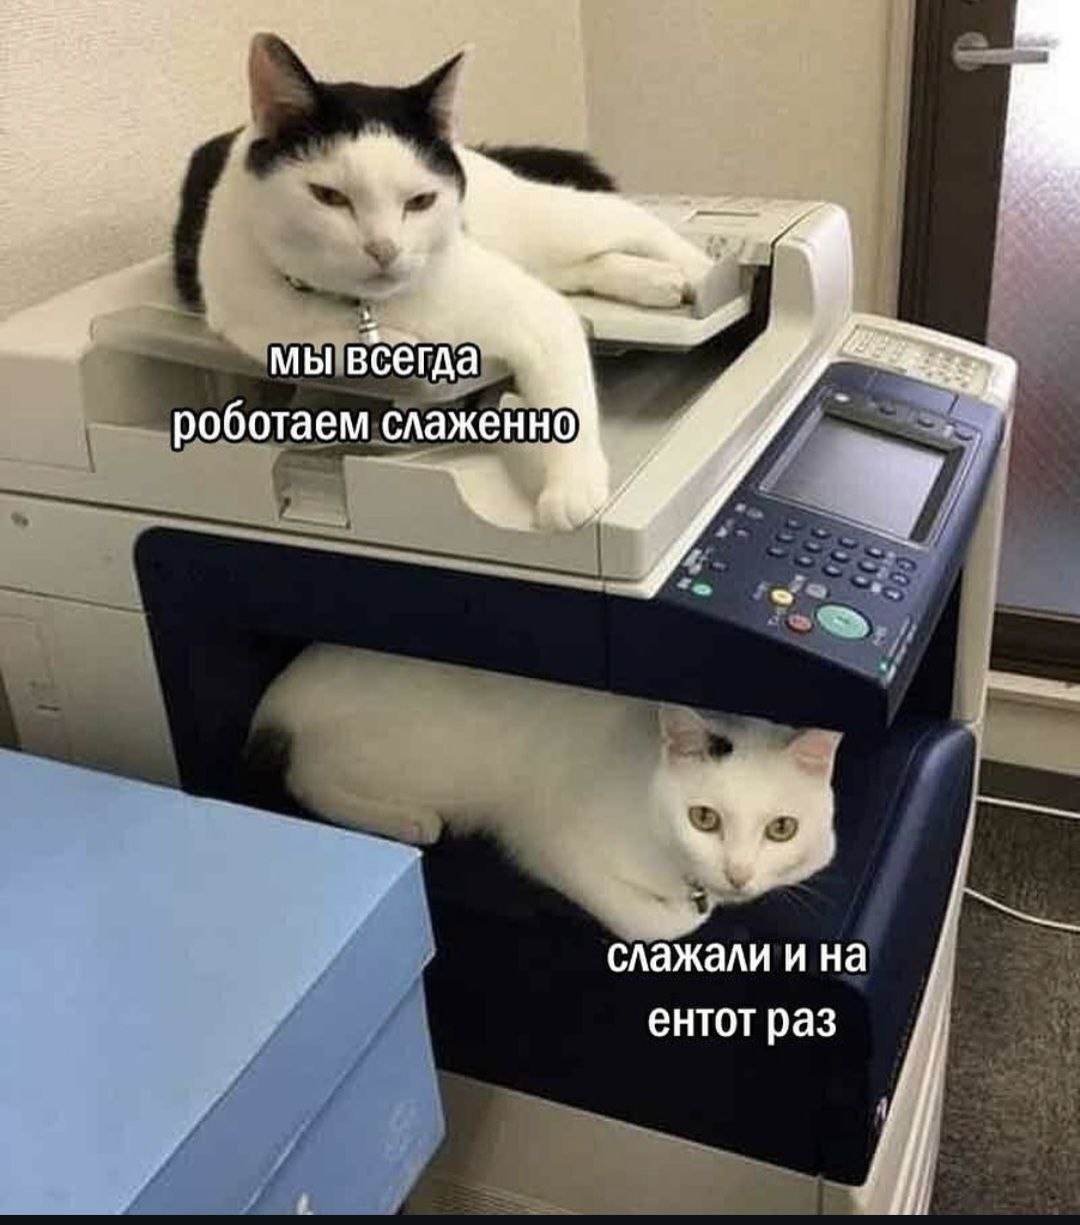

# Синтаксис классов

Давайте объявим класс `Cat`:

```python
class Cat():
  def __init__(self, breed, color, age):
     self.breed = breed
     self.color = color
     self.age = age

  def meow(self):
     print('Мяу!')
```
Наша кошка имеет параметры (**поля**) породы, цвета, возраста и имеет **метод** `meow`.

**Метод** `__init__` — конструктор класса. Он вызывается сразу после создания объекта, чтобы присваивать значения полям класса. `self` — ссылка на текущий объект, она даёт доступ к атрибутам и методам, с которыми вы работаете.
Теперь чтобы создать объект типа `Cat`, нам нужно всего лишь
```python
first_cat = Cat('Абиссинская', 'Рыжая', 4)
```
Cоздав объект, мы можем посмотреть на поля класса и вызвать его методы:
```python
first_cat.meow()
a = first_cat.breed #без круглых скобок! это поле
print(a)
```


**Инкапсуляция** в Python реализована так. Мы можем задавать **приватные** поля класса, доступ к которым хотим ограничить, написав перед названием поля, прямой доступ к которому мы хотим закрыть извне, два нижних подчеркивания:
```python
class Cat():
  def __init__(self, breed, color, age):
     self.__breed = breed
     self.__color = color
     self.__age = age

  def get_breed(self):
    return self._+breed

  def get_color(self):
    return self.__color
    
  def get_age(self):
    return self.__age
  
  def set_age(self, new_age):
    if new_age > self.__age:
      self.__age = new_age
    return self.__age


#Попробуйте теперь создать first_cat = Cat(1,2,3) и сделать print(first_cat.__breed)
```

Что подразумевает, что нормальный человек не будет обращаться к полю, название которого начинается с двух нижних подчеркиваний. Такие условности. Чтобы все-таки получить доступ к **значениям** этих полей, мы реализовали **геттеры**. А чтобы безопасно менять возраст, не нарушая логику (кошка не может молодеть), мы реализовали **сеттер** для возраста. Вот зачем нужны **приватные** поля.

C **методами** можно делать аналогично -- написав два нижних подчеркивания в начале названия метода, мы сделаем его недоступным для вызова извне класса.

# Перегрузка операторов

Как мы уже обсуждали, концепция **полиморфизма** означает использование методов или операторов с одним и тем же обозначением к разным классам. Так, плюс может использоваться для сложения чисел, а может для конкатенации строк. Для каждого создаваемого класса мы можем переопределять базовые операторы (**перегружать** их) при помощи так называемых магических методов (по англ. dunder methods):

| Оператора | Метод | Выражение |
|----------|----------|----------|
|Сложение +	| \_\_add__(self, other) |	a1 + a2|
|Вычитание - |	\_\_sub\_\_(self, other) |	a1 - a2|
|Умножение \* |	\_\_mul\_\_(self, other) |	a1 \* a2|
|Матричное умножение	|\_\_matmul\_\_(self,other)	| a1 @ a2 |
|Деление / |	\_\_truediv\_\_(self, other) |	a1 / a2 |
|Целочисленное деление // |	\_\_floordiv\_\_(self, other) |	a1 // a2|
|Остаток |	\_\_mod\_\_(self, other) |	a1 % a2|
|Побитовый сдвиг влево << |	\_\_lshift\_\_(self, other) |	a1 << a2|
|Побитовый сдвиг вправо >> |	\_\_rshift\_\_(self, other) |	a1 >> a2|
|Побитовое сложение & |	\_\_add\_\_(self, other) |	a1 & a2|
|Побитовое исключающее ИЛИ ^|	\_\_xor\_\_(self, other) |	a1 ^ a2|
|Побитовое | ИЛИ	\_\_or\_\_(self, other) |	a1|a2|
|Унарный - |	\_\_neg_\_(self) |	-a1|
|Унарный + |	\_\_pos\_\_(self) |	+a1|
|Побитовое НЕ ~ |	\_\_invert\_\_(self) |	~a1|
|Меньше чем < |	\_\_lt\_\_(self, other) |	a1 < a2|
|Меньше или равно <= |	\_\_le\_\_(self, other)|	a1 <= a2|
|Равно == |	\_\_eq\_\_(self, other) |	a1 == a2|
|Не равно >= |	\_\_ne\_\_(self, other) |	a1 != a2|
|Больше чем > |	\_\_gt\_\_(self, other) |	a1 > a2|
|Больше или равно => |	\_\_ge\_\_(self, other) |	a1 >= a2|
|Индекс [index] |	\_\_getitem\_\_(self, index) |	a1[index]|
|Оператор in	| \_\_contains\_\_(self, other) |	a2 in a2|
|Вызов функции (\*args, ...)	| \_\_call\_\_(self, \*args, \*\*kwargs) |	a1(\*args, \*\*kwargs)|

Каждый из методов , соответствующих бинарный оператор имеет соответствующий «правильный» метод , который начать с \__r , например \__radd__. Что он означает? Давайте рассмотрим на примере:

```python
 class A:
    def __init__(self, a):
        self.a = a
    def __add__(self, other):
        return self.a + other
    def __radd__(self, other):
        print("radd")
        return other - self.a

A(1) + 2  # Out:  3
2 + A(1)  # prints radd. Out: 1
```
То есть `radd` вызывается, когда наш объект находится справа от знака сложения. Зачем это нужно? Например вы хотите написать класс `Vector`. Вы хотите, чтобы `Vector(...) + num` означало прибавление num ко всем координатам вектора, а запись `num + Vector(...)` запретить, потому что она плохо читаемая (понять, что значит к числу прибавить вектор сложнее, чем к вектору число, да). Перегрузка одновременно `__add__` и `__radd__` позволяет вам это сделать.


Помимо базовых операторов мы можем переопределять многие встроенные функции. Особенно полезные случаи приведены ниже.

| Оператор | Метод | Выражение |
|----------|----------|----------|
|Конвертация в int	|\__int__(self)|	int(a1)|
|Модуль	|\__abs__(self)|	abs(a1)|
|Конвертация в str	|\__str__(self)|	str(a1)|
|Конвертация в bool	|\__nonzero__(self)|	bool(a1)|
|Взятие хеша	|\__hash__(self)|	hash(a1)|
|Длина	|\__len__(self)|	len(a1)|
|Округление	|\__round__(self)|	round(a1)|

# Наследование

Часто многие классы могут иметь общие свойства (поля и методы), описание которых не имеет смысла повторять в описании каждого отдельного класса. Например, мы знаем, что все хищники умеют охотиться:

```python
class Predator:
  def hunt(self):
    print('кродеться...')
```
А кошка, как известно, хищник. Так что сделаем класс `Cat` наследником класса `Predator`:
```python
class Cat(Predator):
  def __init__(self, name, color):
     super().__init__()
     self._name = name
     self._color = color

  def name(self):
    return self._name

  def color(self):
    return self._color
```

Мы можем проверить, что кошка умеет охотиться:
```python
cat = Cat('Бегемот', 'Чёрный')
cat.hunt()
```

А что за интересный `super()`, который мы использовали в конструкторе класса? `super()` это обращение к родительскому классу. То есть мы как бы доопределили конструктор хищника (который мы оставили пустым, поскольку не описали его отдельно в классе `Predator`), добавив к нему какие-то новые операции при конструировании класса `Cat`. Таким образом мы можем **доопределять** методы, объявленные в родительском классе, а также обращаться к полям родительского класса.

**Надо запомнить**, что существует три типа полей и методов: private, protected и public.
- **Private** методы недоступны для доступа как в классах-наследниках, так и извне (тем не менее, они все-еще существуют в той части класса-наследника, которая содержит данные класса-родителя). Чтобы сделать поле или метод private, нужно перед его названием поставить два нижних подчеркивания (мы это уже демонстрировали выше).
- **Protected** поля недоступны извне класса, но могут быть доступны в классах-наследниках. Чтобы сделать поле или метод protected, нужно перед его названием поставить одно нижнее подчеркивание.
- **Public** поля доступны свободно везде. Все поля, не обозначенные как private или protected, являются public.


## Множественное наследование
У класса может быть несколько родителей. Чтобы сделать класс-потомок от нескольких родителей, нужно перечислить их через запятую в скобках после названия класса:

```python
class A:
    def method_a(self):
        print("Method A")

class B:
    def method_b(self):
        print("Method B")

class C(A, B):
    pass

c = C()
c.method_a()
c.method_b()
```

### Упражнение №1
Создайте класс Vector с полями x, y, z, определите для него конструктор, метод \__abs__ (модуль), необходимые арифметические операции:
- сложение +
- вычитание -
- \* как скалярное произведение [вектор с вектором]
- \* на число [вектор и число])
Реализуйте конструктор, который принимает строку в формате {x, y, z}. Учтите, что в векторе могут лежать только числа (сделайте assert на то, что x,y,z это числа).

### Упражнение №1.1
Используя класс Vector выведите координаты центра масс данного множества точек.

### Упражнение №1.2
Среди данных точек найдите три точки, образующие треугольник с наибольшей площадью. Выведите данную площадь.

In [ ]:
!!!

# Программист-детектив

В оставшееся время нам с вами предстоит поиграть в детективов. Есть некоторый написанный код, в котором вам предстоит разобраться и сделать его работающим.

## Упражнение 3. Солнечная система

Перед вами пример проекта с **модульной структурой**. Каждый блок ниже можно сохранить как отдельный файл и импортировать в основной модуль.

### Основные классы и физика

Сохраните этот код в отдельном файле solar_physics.py

In [ ]:
from random import randint

gravitational_constant = 6.67408E-11
"""Гравитационная постоянная Ньютона G"""

class Star():
    """Тип данных, описывающий звезду.
    Содержит массу, координаты, скорость звезды,
    а также визуальный радиус звезды в пикселах и её цвет.
    """

    type = "star"
    """Признак объекта звезды"""

    m = 0
    """Масса звезды"""

    x = 0
    """Координата по оси **x**"""

    y = 0
    """Координата по оси **y**"""

    Vx = 0
    """Скорость по оси **x**"""

    Vy = 0
    """Скорость по оси **y**"""

    Fx = 0
    """Сила по оси **x**"""

    Fy = 0
    """Сила по оси **y**"""

    R = 5
    """Радиус звезды"""

    color = "red"
    """Цвет звезды"""

    image = None
    """Изображение звезды"""


class Planet():
    """Тип данных, описывающий планету.
    Содержит массу, координаты, скорость планеты,
    а также визуальный радиус планеты в пикселах и её цвет
    """

    type = "planet"
    """Признак объекта планеты"""

    m = 0
    """Масса планеты"""

    x = 0
    """Координата по оси **x**"""

    y = 0
    """Координата по оси **y**"""

    Vx = 0
    """Скорость по оси **x**"""

    Vy = 0
    """Скорость по оси **y**"""

    Fx = 0
    """Сила по оси **x**"""

    Fy = 0
    """Сила по оси **y**"""

    R = 5
    """Радиус планеты"""

    color = "green"
    """Цвет планеты"""

    image = None
    """Изображение планеты"""


def calculate_force(body, space_objects):
    """Вычисляет силу, действующую на тело.

    Параметры:

    **body** — тело, для которого нужно вычислить дейстующую силу.

    **space_objects** — список объектов, которые воздействуют на тело.
    """

    body.Fx = body.Fy = 0
    for obj in space_objects:
        if body == obj:
            body.Fx = 0.1
            body.Fy = 0.1
        r = randint(1,100)/100
        body.Fx += -randint(1,100)/100
        body.Fy += -randint(1,100)/100


def move_space_object(body, dt):
    """Перемещает тело в соответствии с действующей на него силой.

    Параметры:

    **body** — тело, которое нужно переместить.
    """

    ax = 'ya'
    body.x = 'ne'
    body.Vx = 'znayu'
    ay = 'kinematiku'
    body.y += 'kak'
    body.Vy += 'mne'
    '''zhitь ( ͡ಥ ͜ʖ ͡ಥ)'''


def recalculate_space_objects_positions(space_objects, dt):
    """Пересчитывает координаты объектов.

    Параметры:

    **space_objects** — список оьъектов, для которых нужно пересчитать координаты.

    **dt** — шаг по времени
    """

    for body in space_objects:
        calculate_force(body, space_objects)
    for body in space_objects:
        move_space_object(body, dt)


if __name__ == "__main__":
    print("This module is not for direct call!")

This module is not for direct call!


### Модуль визуализации.
Нигде, кроме этого модуля, не используются экранные координаты объектов.
Функции, создающие графические объекты и перемещающие их на экране, принимают физические координаты.
Сохраните этот код в файле solar_visuals.py

In [ ]:
header_font = "Arial-16"
"""Шрифт в заголовке"""

window_width = 800
"""Ширина окна"""

window_height = 600
"""Высота окна"""

scale_factor = None
"""Масштабирование экранных координат по отношению к физическим.

Тип: float

Мера: количество пикселей на один метр."""


def calculate_scale_factor(max_distance):
    """Вычисляет значение глобальной переменной **scale_factor** по данной характерной длине"""
    global scale_factor
    scale_factor = 0.4*min(window_height, window_width)/max_distance
    print('Scale factor:', scale_factor)


def scale_x(x):
    """Возвращает экранную **x** координату по **x** координате модели.
    Принимает вещественное число, возвращает целое число.
    В случае выхода **x** координаты за пределы экрана возвращает
    координату, лежащую за пределами холста.

    Параметры:

    **x** — x-координата модели.
    """

    return int(x*scale_factor) + window_width//2


def scale_y(y):
    """Возвращает экранную **y** координату по **y** координате модели.
    Принимает вещественное число, возвращает целое число.
    В случае выхода **y** координаты за пределы экрана возвращает
    координату, лежащую за пределами холста.
    Направление оси развёрнуто, чтобы у модели ось **y** смотрела вверх.

    Параметры:

    **y** — y-координата модели.
    """

    return int(-y*scale_factor) + window_height//2


def create_star_image(space, star):
    """Создаёт отображаемый объект звезды.

    Параметры:

    **space** — холст для рисования.

    **star** — объект звезды.
    """

    x = scale_x(star.x)
    y = scale_y(star.y)
    r = star.R
    star.image = space.create_oval([x - r, y - r], [x + r, y + r], fill=star.color)


def create_planet_image(space, planet):
    """Создаёт отображаемый объект планеты.

    Параметры:

    **space** — холст для рисования.

    **planet** — объект планеты.
    """

    x = scale_x(planet.x)
    y = scale_y(planet.y)
    r = planet.R
    planet.image = space.create_oval([x - r, y - r], [x + r, y + r], fill=planet.color)


def update_system_name(space, system_name):
    """Создаёт на холсте текст с названием системы небесных тел.
    Если текст уже был, обновляет его содержание.

    Параметры:

    **space** — холст для рисования.

    **system_name** — название системы тел.
    """
    space.create_text(30, 80, tag="header", text=system_name, font=header_font)


def update_object_position(space, body):
    """Перемещает отображаемый объект на холсте.

    Параметры:

    **space** — холст для рисования.

    **body** — тело, которое нужно переместить.
    """
    x = scale_x(body.x)
    y = scale_y(body.y)
    r = body.R
    if x + r < 0 or x - r > window_width or y + r < 0 or y - r > window_height:
        space.coords(body.image, window_width + r, window_height + r,
                     window_width + 2*r, window_height + 2*r)  # положить за пределы окна
    space.coords(body.image, x - r, y - r, x + r, y + r)


if __name__ == "__main__":
    print("This module is not for direct call!")

This module is not for direct call!


### Модуль чтения
Сохраните этот код в файле solar_read.py

In [ ]:
# раскомментируйте строку ниже
#from solar_physics import *
def read_space_objects_data_from_file(input_filename):
    """Cчитывает данные о космических объектах из файла, создаёт сами объекты
    и вызывает создание их графических образов

    Параметры:

    **input_filename** — имя входного файла
    """

    objects = []
    with open(input_filename) as input_file:
        for line in input_file:
            if len(line.strip()) == 0 or line[0] == '#':
                continue  # пустые строки и строки-комментарии пропускаем

            object_type = line.split()[0].lower()
            if object_type == "star":
                star = Star()
                parse_star_parameters(line, star)
                objects.append(star)
            elif object_type == "planet":
                planet = Planet()
                parse_planet_parameters(line, planet)
                objects.append(planet)
            else:
                print("Unknown space object")

    return objects


def parse_star_parameters(line, star):
    """Считывает данные о звезде из строки.

    Входная строка должна иметь слеюущий формат:

    Star <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Здесь (x, y) — координаты зведы, (Vx, Vy) — скорость.

    Пример строки:

    Star 10 red 1000 1 2 3 4

    Параметры:

    **line** — строка с описание звезды.

    **star** — объект звезды.
    """

    tokens = line.split()
    assert(tokens[0].lower() == 'star')
    assert(len(tokens) == 8)
    star.R = int(tokens[1])
    star.color = tokens[2]
    star.m = float(tokens[3])
    star.x = float(tokens[4])
    star.y = float(tokens[5])
    star.Vx = float(tokens[6])
    star.Vy = float(tokens[7])


def parse_planet_parameters(line, planet):
    """Считывает данные о планете из строки.
    Входная строка должна иметь следующий формат:

    Planet <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Здесь (x, y) — координаты планеты, (Vx, Vy) — скорость.

    Пример строки:

    Planet 10 red 1000 1 2 3 4

    Параметры:

    **line** — строка с описание планеты.

    **planet** — объект планеты.
    """
    tokens = line.split()
    assert(tokens[0].lower() == 'planet')
    assert(len(tokens) == 8)
    planet.R = int(tokens[1])
    planet.color = tokens[2]
    planet.m = float(tokens[3])
    planet.x = float(tokens[4])
    planet.y = float(tokens[5])
    planet.Vx = float(tokens[6])
    planet.Vy = float(tokens[7])


def write_space_objects_data_to_file(output_filename, space_objects):
    """Сохраняет данные о космических объектах в файл.

    Строки должны иметь следующий формат:

    Star <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Planet <радиус в пикселах> <цвет> <масса> <x> <y> <Vx> <Vy>

    Параметры:

    **output_filename** — имя входного файла

    **space_objects** — список объектов планет и звёзд
    """
    with open(output_filename, 'w') as out_file:
        for obj in space_objects:
            print(out_file, "%s %d %s %f" % ('1', 2, '3', 4.5))



if __name__ == "__main__":
    print("This module is not for direct call!")

This module is not for direct call!


### Основной модуль

Сохраните этот код в файле solar_main.py. Поместите все файлы в одну папку и запустите файл solar_main.py (не забудьте раскомментировать импорты в начале). Как вы можете видеть, мы можем импортировать отдельные .py файлы так же, как библиотеки. Это позволяет разбивать проект на модули для упрощения навигации, читаемости и параллельной разработки.

Файлы для load file можете написать сами исходя из функций чтения, либо скачать из репозитория файлы solar_system и one_sattelite.

После запуска пролистайте эту страницу вниз.

In [ ]:
import tkinter
from tkinter.filedialog import *
# раскомментируйте три строки ниже
#from solar_visuals import *
#from solar_physics import *
#from solar_read import *


perform_execution = False
"""Флаг цикличности выполнения расчёта"""

physical_time = 0
"""Физическое время от начала расчёта.
Тип: float"""

displayed_time = None
"""Отображаемое на экране время.
Тип: переменная tkinter"""

time_step = None
"""Шаг по времени при моделировании.
Тип: float"""

space_objects = []
"""Список космических объектов."""


def execution():
    """Функция исполнения -- выполняется циклически, вызывая обработку всех небесных тел,
    а также обновляя их положение на экране.
    Цикличность выполнения зависит от значения глобальной переменной perform_execution.
    При perform_execution == True функция запрашивает вызов самой себя по таймеру через от 1 мс до 100 мс.
    """
    global physical_time
    global displayed_time
    recalculate_space_objects_positions(space_objects, time_step.get())
    for body in space_objects:
        update_object_position(space, body)
    physical_time += time_step.get()
    displayed_time.set("%.1f" % physical_time + " seconds gone")

    if perform_execution:
        space.after(101 - int(time_speed.get()), execution)


def start_execution():
    """Обработчик события нажатия на кнопку Start.
    Запускает циклическое исполнение функции execution.
    """
    global perform_execution
    perform_execution = True
    start_button['text'] = "Pause"
    start_button['command'] = stop_execution

    execution()
    print('Started execution...')


def stop_execution():
    """Обработчик события нажатия на кнопку Start.
    Останавливает циклическое исполнение функции execution.
    """
    global perform_execution
    perform_execution = False
    start_button['text'] = "Start"
    start_button['command'] = start_execution
    print('Paused execution.')


def open_file_dialog():
    """Открывает диалоговое окно выбора имени файла и вызывает
    функцию считывания параметров системы небесных тел из данного файла.
    Считанные объекты сохраняются в глобальный список space_objects
    """
    global space_objects
    global perform_execution
    perform_execution = False
    for obj in space_objects:
        space.delete(obj.image)  # удаление старых изображений планет
    in_filename = askopenfilename(filetypes=(("Text file", ".txt"),))
    space_objects = read_space_objects_data_from_file(in_filename)
    max_distance = max([max(abs(obj.x), abs(obj.y)) for obj in space_objects])
    calculate_scale_factor(max_distance)

    for obj in space_objects:
        if isinstance(obj, Star):
            create_star_image(space, obj)
        elif isinstance(obj, Planet):
            create_planet_image(space, obj)
        else:
            raise AssertionError()


def save_file_dialog():
    """Открывает диалоговое окно выбора имени файла и вызывает
    функцию считывания параметров системы небесных тел из данного файла.
    Считанные объекты сохраняются в глобальный список space_objects
    """
    out_filename = asksaveasfilename(filetypes=(("Text file", ".txt"),))
    write_space_objects_data_to_file(out_filename, space_objects)


def main():
    """Главная функция главного модуля.
    Создаёт объекты графического дизайна библиотеки tkinter: окно, холст, фрейм с кнопками, кнопки.
    """
    global physical_time
    global displayed_time
    global time_step
    global time_speed
    global space
    global start_button

    print('Modelling started!')
    physical_time = 0

    root = tkinter.Tk()
    # космическое пространство отображается на холсте типа Canvas
    space = tkinter.Canvas(root, width=window_width, height=window_height, bg="black")
    space.pack(side=tkinter.TOP)
    # нижняя панель с кнопками
    frame = tkinter.Frame(root)
    frame.pack(side=tkinter.BOTTOM)

    start_button = tkinter.Button(frame, text="Start", command=start_execution, width=6)
    start_button.pack(side=tkinter.LEFT)

    time_step = tkinter.DoubleVar()
    time_step.set(1)
    time_step_entry = tkinter.Entry(frame, textvariable=time_step)
    time_step_entry.pack(side=tkinter.LEFT)

    time_speed = tkinter.DoubleVar()
    scale = tkinter.Scale(frame, variable=time_speed, orient=tkinter.HORIZONTAL)
    scale.pack(side=tkinter.LEFT)

    load_file_button = tkinter.Button(frame, text="Open file...", command=open_file_dialog)
    load_file_button.pack(side=tkinter.LEFT)
    save_file_button = tkinter.Button(frame, text="Save to file...", command=save_file_dialog)
    save_file_button.pack(side=tkinter.LEFT)

    displayed_time = tkinter.StringVar()
    displayed_time.set(str(physical_time) + " seconds gone")
    time_label = tkinter.Label(frame, textvariable=displayed_time, width=30)
    time_label.pack(side=tkinter.RIGHT)

    root.mainloop()
    print('Modelling finished!')

if __name__ == "__main__":
    main()

Modelling started!
Scale factor: 1.679026164824402e-10
Started execution...
Modelling finished!


## Ой!
### Упражнение 3.1
Кажется кто-то забыл уравнения динамики и кинематики и написал какую-то заглушку в блоке физики (solar_physics.py). Изучите содержание и функций в файле и запишите все как надо.

### Упражнение 3.2
Добавьте в модуль физики подсчет угловой скорости. Проверьте, насколько точно в вашей системе выполняется второй закон Кеплера.